In [1]:
#Import libraries

import os
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib
from pathlib import Path
%matplotlib inline
from PIL import Image
from shapely.geometry import Polygon

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 12, 8

/home/luisfigueiredo/.local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
current_path = os.getcwd()
current_path

'/home/luisfigueiredo/JUNO/notebooks'

In [3]:
aviso_folder = os.path.join(current_path,"../data/AVISO")
aviso_folder

'/home/luisfigueiredo/JUNO/notebooks/../data/AVISO'

In [4]:
nc_path = os.path.join(aviso_folder, "Eddy_trajectory_nrt_3.2exp_cyclonic_20180101_20220829.nc")
ds = nc.Dataset(nc_path)
data = xr.load_dataset(nc_path)

In [5]:
data

<xarray.Dataset>
Dimensions:                        (NbSample: 20, obs: 5944501)
Dimensions without coordinates: NbSample, obs
Data variables: (12/27)
    amplitude                      (obs) float32 0.0437 0.0716 ... 0.0284 0.0396
    effective_area                 (obs) float32 6.781e+09 ... 3.221e+09
    effective_contour_height       (obs) float32 0.112 0.13 0.11 ... -0.47 -0.46
    effective_contour_latitude     (obs, NbSample) float32 33.05 33.12 ... 27.88
    effective_contour_longitude    (obs, NbSample) float32 142.1 142.0 ... 279.6
    effective_contour_shape_error  (obs) float32 60.0 45.0 48.5 ... 52.5 56.0
    ...                             ...
    speed_contour_longitude        (obs, NbSample) float32 142.1 141.9 ... 279.6
    speed_contour_shape_error      (obs) float32 33.0 30.0 34.5 ... 51.5 56.0
    speed_radius                   (obs) float32 3.575e+04 3.85e+04 ... 3.68e+04
    time                           (obs) datetime64[ns] 2018-01-01 ... 2022-0...
    track                          (obs) uint32 0 0 0 0 ... 135109 135109 135109
    uavg_profile                   (obs, NbSample) float32 0.1932 ... 0.5142
Attributes: (12/19)
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    creator_email:             aviso@altimetry.fr
    creator_url:               https://www.aviso.altimetry.fr
    date_created:              2022-10-06T06:36:20Z
    framework_used:            https://github.com/AntSimi/py-eddy-tracker
    ...                        ...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   This dataset contains eddy atlas from all-sate...
    time_coverage_duration:    P1702D
    time_coverage_end:         2022-08-29T00:00:00Z
    time_coverage_start:       2018-01-01T00:00:00Z
    title:                     Mesoscale Cyclonic Eddies in Altimeter Observa...

#### Import sst data as an xarray

In [12]:
def get_data(filename):
    
    """
    Function to get our netCDF file that is stored in the data directory inside the MUR_seasonal_data folder
    and convert it to an xarray.
    The data parameter is the string name of the netCDF file we want to import
    """
    
    base_path = os.getcwd()
    base_path = os.path.join(base_path, '../data/MUR_data_images_gif')
    
    nc_path = os.path.join(base_path, filename)
    data_xarray = xr.load_dataset(nc_path)
    
    #Convert temperature from Kelvin to Celsius
    data_xarray['analysed_sst'] = data_xarray['analysed_sst'] - 273.15
    
    return data_xarray

In [13]:
xarray_mur = get_data('sst_20220829.nc')

In [14]:
xarray_mur

<xarray.Dataset>
Dimensions:       (lat: 1001, lon: 1401, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 2022-08-29T09:00:00
  * lat           (lat) float32 35.0 35.01 35.02 35.03 ... 44.98 44.99 45.0
  * lon           (lon) float32 -19.0 -18.99 -18.98 -18.97 ... -5.02 -5.01 -5.0
Data variables:
    analysed_sst  (time, lat, lon) float32 23.43 23.43 23.43 ... 21.1 21.11
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [15]:
def real_sst_image(data_xarray):
        
    """
    Function to store the real sst image
    """
    
    sst_image = data_xarray['analysed_sst'][0,:,:].values
    
    return sst_image

In [89]:
sst_image = real_sst_image(xarray_mur)

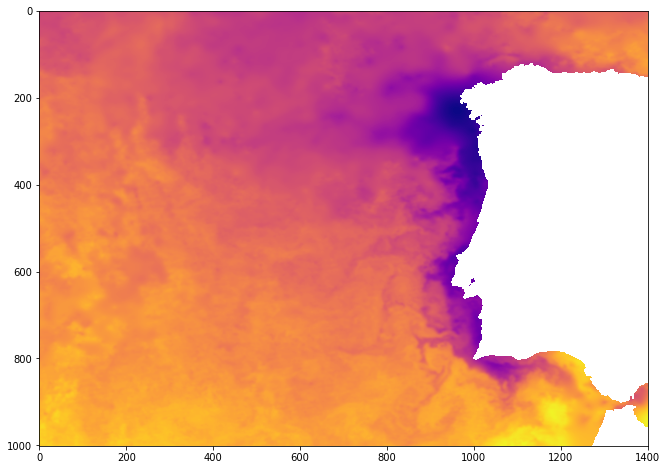

In [148]:
plt.imshow(np.flipud(sst_image), cmap='plasma', extent=(0, 1401, 1001, 0))   #left, right, bottom, top

In [172]:
#Descobrir o CRS deste dataset
import rioxarray as rxr
path = '/home/luisfigueiredo/JUNO/data/MUR_data_images_gif/sst_20220829.nc'
lidar_dem = rxr.open_rasterio(path)
print("The CRS of this data is:", lidar_dem.rio.crs)

The CRS of this data is: None


In [17]:
#Como estamos a fazer um slicing atraves de 3 booleans não podemos usar o np.logical_and
tracking = data['track'].values[(data['latitude'].values > 35) & (data['latitude'].values < 45) & (data['longitude'].values >341) & (data['longitude'].values < 355) & (data['time'].values == np.datetime64('2022-08-29T00:00:00.000000000'))]
tracking
# Eddies identified in the location: lat[35; 45] and lon[330;350] from 20 of August to 30 of August 2022

array([128899, 129205, 129778, 130217, 130612, 131713, 132124, 132350,
       133063, 133599, 134302, 134406, 134832, 134976, 134979, 134985],
      dtype=uint32)

In [18]:
#todos as listas de contours das varias vezes em que o eddy 128899 foi identificado (desde sempre)
x1  = data['effective_contour_longitude'].values[(data['track'] == 128899)]-360

In [19]:
x1[-1]    #contours for the last time that the vortice was identified

array([-17.880005, -17.940002, -18.119995, -18.160004, -18.119995,
       -18.049988, -18.040009, -17.619995, -17.529999, -17.380005,
       -17.369995, -17.299988, -17.299988, -17.380005, -17.390015,
       -17.369995, -17.330017, -17.390015, -17.630005, -17.880005],
      dtype=float32)

In [20]:
x = data['effective_contour_longitude'].values[(data['track'] == 128899) & (data['time'].values == np.datetime64('2022-08-29T00:00:00.000000000'))] - 360

In [21]:
x

array([[-17.880005, -17.940002, -18.119995, -18.160004, -18.119995,
        -18.049988, -18.040009, -17.619995, -17.529999, -17.380005,
        -17.369995, -17.299988, -17.299988, -17.380005, -17.390015,
        -17.369995, -17.330017, -17.390015, -17.630005, -17.880005]],
      dtype=float32)

In [22]:
eddie_lons = []
eddie_lats = []

centro_x = []
centro_y = []
for value in tracking:
    
    ####################################################################################
    #-360 nos valores maiores que 180
    ########################################################################
    
    x = data['effective_contour_longitude'].values[(data['track'] == value)][-1] - 360    #-1 last time the eddy was identified
    y = data['effective_contour_latitude'].values[(data['track'] == value)][-1] 
    
    eddie_lons.append(list(x))
    eddie_lats.append(list(y))
    
#find center coordinates of all the eddies identified in those coordinates in that period
for i in range(len(eddie_lons)):

    eddie_x = data['effective_contour_longitude'].values[(data['track'] == value)][-1] - 360
    eddie_y = data['effective_contour_latitude'].values[(data['track'] == value)][-1] 

    poly = Polygon(zip(eddie_lons[i],eddie_lats[i]))

    poly_centroid_x = poly.centroid.coords[0][0]
    poly_centroid_y = poly.centroid.coords[0][1]

    centro_x.append(poly_centroid_x)  #coordinates of the centroid
    centro_y.append(poly_centroid_y)

In [110]:
10/1001

0.00999000999000999

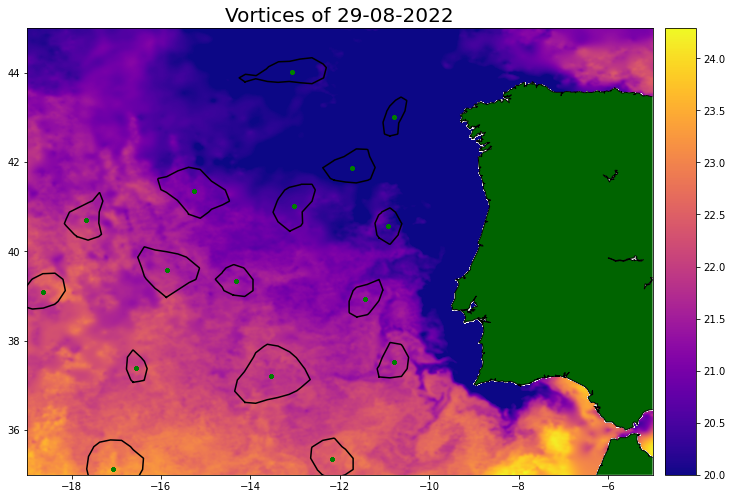

In [175]:
fig = plt.figure(figsize=(12,10))

m = Basemap(projection='cyl',              #projection = mill
           llcrnrlat = 35,                      #35
           llcrnrlon = -19,                     #-20
           urcrnrlat = 45,                      # 45
           urcrnrlon = -5,                      #-5
           resolution = 'i', suppress_ticks=False)

m.drawcoastlines()
m.fillcontinents(color = 'darkgreen')   #por zonas continentais a verde
#m.etopo()      #topografia

m.imshow(sst_image, cmap='plasma', extent=(0, 1401, 1001, 0), vmin=20)     #left, right, bottom, top
m.colorbar()

#alterações no extent não fazem qq diferença

for i in range(len(eddie_lons)):
    x1, y1 = m(eddie_lons[i], eddie_lats[i])
    eddies_centro_x, eddies_centro_y = m(centro_x, centro_y)
    m.plot(x1, y1, color='black')
    m.scatter(eddies_centro_x, eddies_centro_y, marker='.', color='green')

#m.drawparallels(np.arange(-90,90,2), labels = [True, False, False, False])
#m.drawmeridians(np.arange(-180,180, 2), labels=[0,0,0,1])


plt.title('Vortices of 29-08-2022', fontsize=20)
plt.show()